In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
'''
Считываем файл и меняем типы данных
'''

df = pd.read_csv('https://docs.google.com/spreadsheets/d/11RH08myguS0YNRbQ4isbfd8g79LOYqoor4qz2_zgtjM/export?format=csv', sep=',')
df.visit_date = pd.to_datetime(df.visit_date, format='%Y-%m-%d %H:%M:%S')
df['month'] = df.visit_date.dt.to_period('M').dt.to_timestamp()

In [4]:
df.head(5)

,visit_date,visits_channel,url,section_name,ttl_visits,ttl_unique_visitors,month
0,2022-11-01,Direct,url_100,section_1,99,99,2022-11-01
1,2022-11-01,SEO,url_100,section_1,23,18,2022-11-01
2,2022-11-01,SEO,url_101,section_1,28,21,2022-11-01
3,2022-11-01,SEO,url_107,section_1,23,14,2022-11-01
4,2022-11-01,SEO,url_109,section_1,45,30,2022-11-01


<h2>Задание 1</h2>

проанализируй трафик за два месяца.

— какие каналы и разделы перформят лучше всего?

— какой канал показал наибольший рост по сравнению с предыдущим месяцем?

— какие урлы самые посещаемые? какая уникальность аудиторию?

представь выводы с помощью сводных таблиц, графиков, диаграмм (на твое усмотрение). какие разрезы ты бы посмотрел дополнительно?

In [5]:
#функция кастомного барплота

def custom_barpolt(df, column_name_x, column_name_y, share_list, name_title, name_x, n_title=18, n_x=12, n_label=12):
    '''
    функция возвращает кастомный барплот с посчитанными доля в bar_label
    
    df - таблица
    column_name_x — колонка, которая пойдёт в х
    column_name_y — колонка, которая пойдёт в y
    share_list — список с подсчитанными долями
    name_title — название таблицы
    name_x — название оси х
    n_title — размер шрифта в заголовке
    n_x — размер шрифта оси х
    n_label — размер шрифта лейбла
    '''
    fig, ax = plt.subplots(figsize=(20, 10))
    ax = sns.barplot(data=df, x=column_name_x, y=column_name_y)
    ax.set_title(name_title, fontsize=n_title, pad=18)
    ax.set_xlabel(name_x, fontsize=n_x, labelpad=12)
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelsize=n_label)
    ax.tick_params(axis='y', labelsize=n_label)
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{x:,.0f} ({share_list[i]})' for i, x in enumerate(container.datavalues)], fontsize=n_label)
        

# функция по формированию долей значений, то есть значение столбца делить на сумму значений
def take_share_list(df, name_column):
    '''
    возвращает серию с подсчитанными долями
    '''
    return (df[name_column] / sum(df[name_column]) * 100) \
                    .round(2).reset_index(drop=True).astype('str') + '%'
        
    

In [6]:
# какие каналы перформят лучше всего?

sum_ttl_unique_visitors = df.groupby('visits_channel').agg(sum_ttl_unique_visitors=('ttl_unique_visitors', 'sum')) \
                            .reset_index().sort_values('sum_ttl_unique_visitors').copy()

share_of_channel = take_share_list(sum_ttl_unique_visitors, 'sum_ttl_unique_visitors')

In [7]:
sum_ttl_unique_visitors

,visits_channel,sum_ttl_unique_visitors
1,E-mail,2889
4,SMM,3441
0,Direct,5138
5,Target,12800
2,Other,96787
3,SEO,126306


'\nЛучше всего из каналов перфомит SEO, так как у этого канала больше всего уникальных пользователей за отведённый период.\n\n'

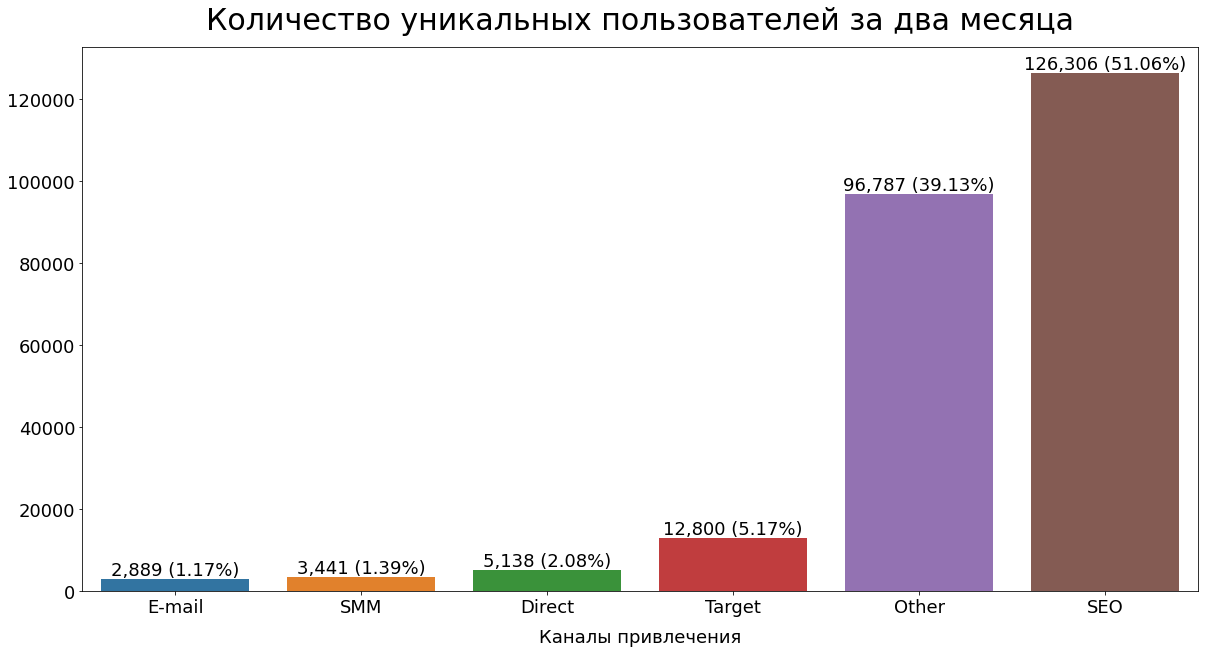

In [8]:
# строим график

custom_barpolt(sum_ttl_unique_visitors, 'visits_channel', 'sum_ttl_unique_visitors',
               share_of_channel, 'Количество уникальных пользователей за два месяца',
               'Каналы привлечения',
               n_title=30, n_x=18, n_label=18)



'''
Лучше всего из каналов перфомит SEO, так как у этого канала больше всего уникальных пользователей за отведённый период.

'''

In [9]:
# какие разделы перформят лучше всего?

sum_ttl_unique_visitors_by_section = df.groupby('section_name').agg(sum_ttl_unique_visitors=('ttl_unique_visitors', 'sum')) \
                            .reset_index().sort_values('sum_ttl_unique_visitors')

share_list_by_section = take_share_list(sum_ttl_unique_visitors_by_section, 'sum_ttl_unique_visitors')

sum_ttl_unique_visitors_by_section

,section_name,sum_ttl_unique_visitors
3,section_4,17787
0,section_1,46633
2,section_3,65826
1,section_2,117115


'\nВсех больше перфомит раздел section_2 за счёт SEO.\n'

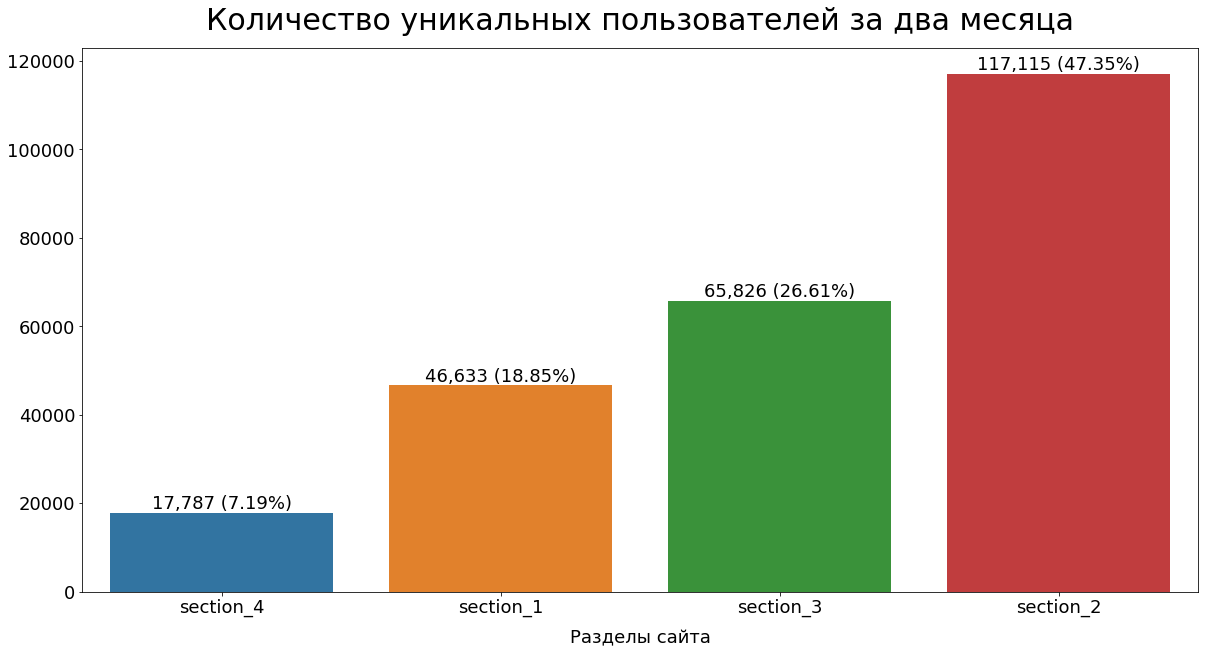

In [10]:
# какие разделы перформят лучше всего?

custom_barpolt(sum_ttl_unique_visitors_by_section, 'section_name', 'sum_ttl_unique_visitors',
               share_list_by_section, 'Количество уникальных пользователей за два месяца',
               'Разделы сайта',
               n_title=30, n_x=18, n_label=18)
'''
Всех больше перфомит раздел section_2 за счёт SEO.
'''

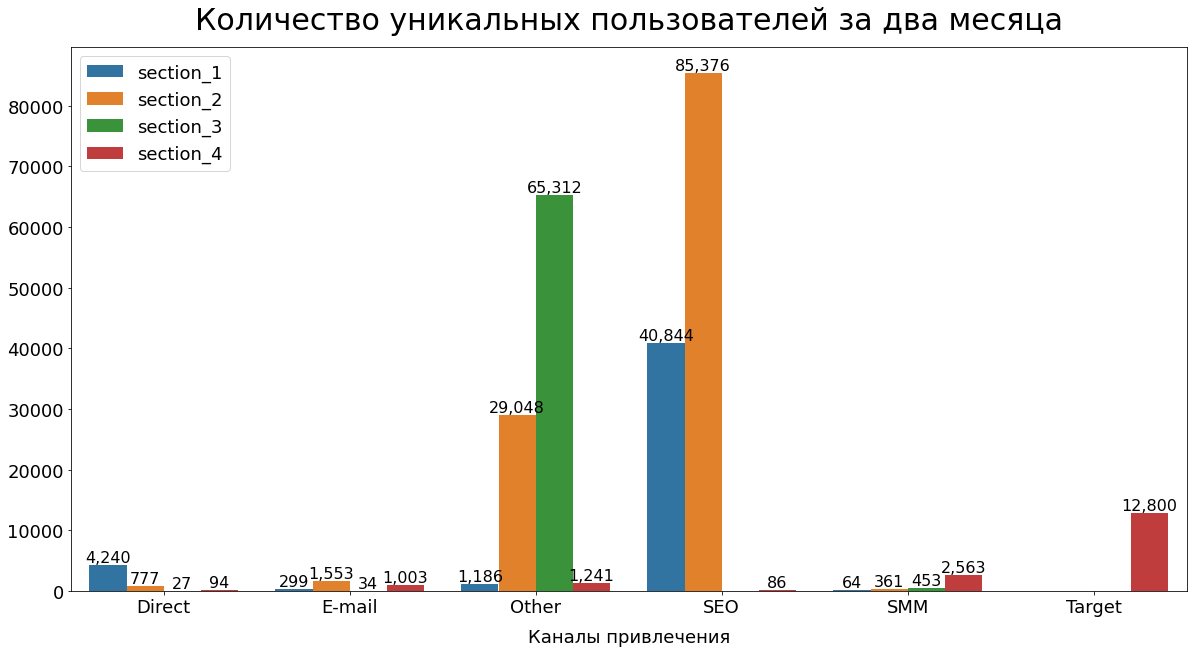

In [11]:
'''
решил дополнительно посмотреть из какого канала больше всего переходит пользователей в разбивке по разделам сайта
'''

unique_visitors_by_channel_and_section = df.groupby(['visits_channel', 'section_name'], as_index=False) \
                                            .agg(sum_unique_visitors=('ttl_unique_visitors', 'sum'))

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=unique_visitors_by_channel_and_section, x='visits_channel', y='sum_unique_visitors', hue='section_name')
ax.set_title('Количество уникальных пользователей за два месяца', fontsize=30, pad=18)
ax.set_xlabel('Каналы привлечения', fontsize=18, labelpad=12)
ax.set_ylabel('')
ax.tick_params(axis='both', labelsize=18)
ax.legend(fontsize=18)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues], fontsize=16)

In [12]:
# какой канал показал наибольший рост по сравнению с предыдущим месяцем?

df_by_month = df.groupby(['month', 'visits_channel'], as_index=False) \
                .agg(sum_unique_visitors=('ttl_unique_visitors', 'sum')) \
                .sort_values(['visits_channel', 'month'], ascending=[True, True])

df_by_month.month = df_by_month.month.astype('str')
df_by_month = df_by_month.pivot(index='visits_channel', columns='month', values='sum_unique_visitors') \
                            .reset_index().fillna(0).copy()
df_by_month['diff_visitors']= df_by_month['2022-12-01'] - df_by_month['2022-11-01']
df_by_month['status_diff'] = df_by_month['diff_visitors'] \
                                .apply(lambda x: 'количество пользователей снизилось' if x < 0 else 'количество пользователей увеличилось')

In [13]:
'''
Всех больше трафик увеличился из канала Target. Ранее этот канал не запускали. Прирост составил 12800.

Всех больше снизился трафик из «Other» предполагаю, 
что в этот канал входят: реферальный трафик, контектсная реклама поиск, медийка и т.д.
Для того, чтобы понять где именно было снижение нужно углубиться в канал Other.
'''

df_by_month

month,visits_channel,2022-11-01,2022-12-01,diff_visitors,status_diff
0,Direct,3195.0,1943.0,-1252.0,количество пользователей снизилось
1,E-mail,1838.0,1051.0,-787.0,количество пользователей снизилось
2,Other,56455.0,40332.0,-16123.0,количество пользователей снизилось
3,SEO,63096.0,63210.0,114.0,количество пользователей увеличилось
4,SMM,1574.0,1867.0,293.0,количество пользователей увеличилось
5,Target,0.0,12800.0,12800.0,количество пользователей увеличилось


In [14]:
#какие урлы самые посещаемые?


df_top_url = df.groupby('url', as_index=False).agg(sum_unique_visitors=('ttl_unique_visitors', 'sum')) \
    .sort_values('sum_unique_visitors', ascending=False)

share_of_total_visitors = take_share_list(df_top_url, 'sum_unique_visitors')

'\nСамая посещаемая страница url_561, при этом доля посещений от всего сайта 23%. То есть это «ненормально» популярная страница.\n'

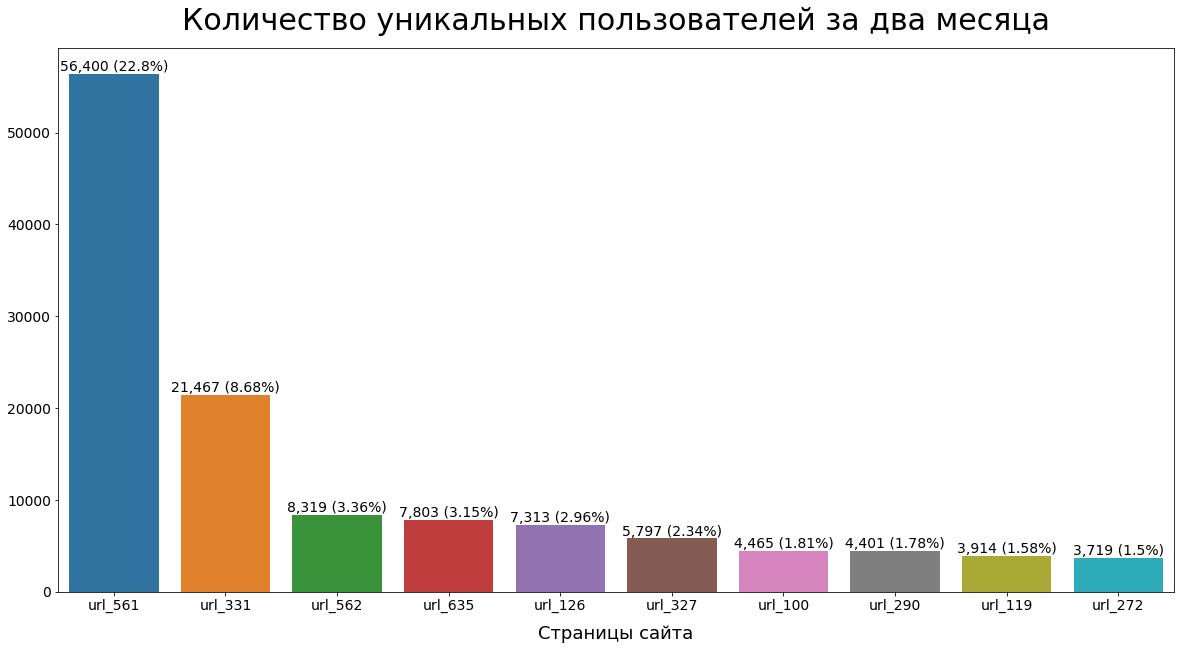

In [15]:
custom_barpolt(df_top_url.head(10), 'url', 'sum_unique_visitors',
               share_of_total_visitors, 'Количество уникальных пользователей за два месяца',
               'Страницы сайта',
               n_title=30, n_x=18, n_label=14)

'''
Самая посещаемая страница url_561, при этом доля посещений от всего сайта 23%. То есть это «ненормально» популярная страница.
'''

In [16]:
'''
Решил посмотреть из какого канала переходит больше всего пользователей на самые посещаемые страницы: url_561, url_331.

Как видим большая часть посетителей из источника «Other».
'''

df.query('(url=="url_561") or (url=="url_331")').groupby(['url', 'visits_channel'], as_index=False) \
    .agg(sum_unique_visitors=('ttl_unique_visitors', 'sum'))



,url,visits_channel,sum_unique_visitors
0,url_331,Other,21346
1,url_331,SEO,121
2,url_561,Other,56400


In [17]:
#какая уникальность аудиторию?

df_unique = df.groupby(['month', 'visits_channel'], as_index=False) \
                .agg(sum_unique_visitors=('ttl_unique_visitors', 'sum'),
                     sum_visits=('ttl_visits', 'sum')) \
                .sort_values(['visits_channel', 'month'], ascending=[True, True]).copy()

df_unique['share_of_unique'] = (df_unique.sum_unique_visitors / df_unique.sum_visits * 100).round(2)
df_unique.month = df_unique.month.astype('str')

In [18]:
df_unique

,month,visits_channel,sum_unique_visitors,sum_visits,share_of_unique
0,2022-11-01,Direct,3195,3322,96.18
5,2022-12-01,Direct,1943,2272,85.52
1,2022-11-01,E-mail,1838,4003,45.92
6,2022-12-01,E-mail,1051,2127,49.41
2,2022-11-01,Other,56455,62404,90.47
7,2022-12-01,Other,40332,46302,87.11
3,2022-11-01,SEO,63096,84870,74.34
8,2022-12-01,SEO,63210,87253,72.44
4,2022-11-01,SMM,1574,3418,46.05
9,2022-12-01,SMM,1867,4577,40.79


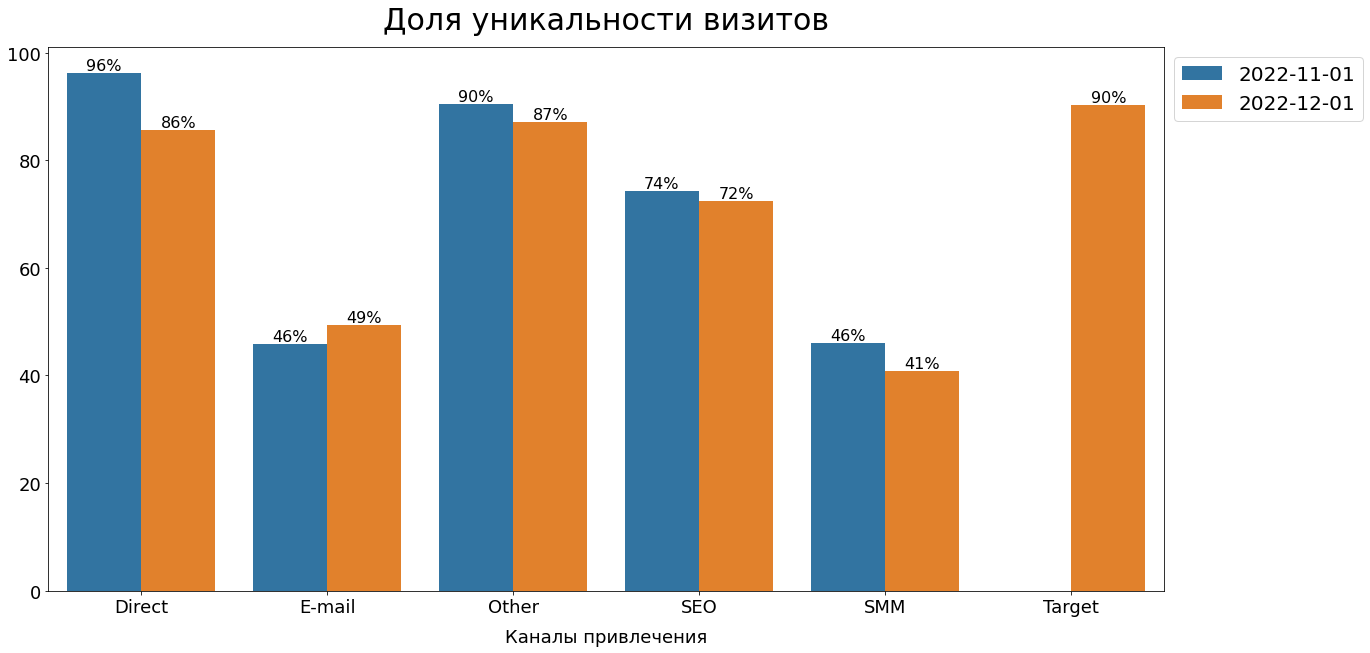

In [19]:
'''
строим график по уникальности аудитории
'''

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=df_unique, x='visits_channel', y='share_of_unique', hue='month')
ax.set_title('Доля уникальности визитов', fontsize=30, pad=18)
ax.set_xlabel('Каналы привлечения', fontsize=18, labelpad=12)
ax.set_ylabel('')
ax.tick_params(axis='both', labelsize=18)
ax.legend(fontsize=20, bbox_to_anchor = (1, 1))
for container in ax.containers:
    ax.bar_label(container, labels=[f'{x:,.0f}%' for x in container.datavalues], fontsize=16)

In [20]:
'''
Самая большая доля уникальных пользователей идёт с канала «Direct», то есть прямые переходы.

Самая низкая доля уникальных пользователей приходит с Email и SMM, скорее всего это связано с тем, что рассылка и посты 
происходят на одну и туже аудиторию.
'''

df_unique.pivot(index='visits_channel', columns='month', values='share_of_unique').reset_index()

month,visits_channel,2022-11-01,2022-12-01
0,Direct,96.18,85.52
1,E-mail,45.92,49.41
2,Other,90.47,87.11
3,SEO,74.34,72.44
4,SMM,46.05,40.79
5,Target,NaN,90.31


In [21]:
'''
посмотрел в какие дни и с какого канала было больше всего переходов (максимумы)
'''

df_test_2 = df.groupby(['visit_date', 'visits_channel'], as_index=False).agg(ttl_unique=('ttl_unique_visitors', 'sum'))
df_test_2.query('(visits_channel=="Other") and (ttl_unique>5000)')

,visit_date,visits_channel,ttl_unique
101,2022-11-25,Other,10232
106,2022-11-26,Other,7745
111,2022-11-27,Other,6044
116,2022-11-28,Other,10482


In [22]:
#какая уникальность аудиторию по урлам?


df_unique_by_urls = df.groupby(['url'], as_index=False).agg(sum_visit =('ttl_visits', 'sum'),
                                        sum_users = ('ttl_unique_visitors', 'sum')).copy()

df_unique_by_urls['percentage_of_uniqueness'] = (df_unique_by_urls.sum_users / df_unique_by_urls.sum_visit).round(4).mul(100)

In [23]:
df_unique_by_urls.sort_values(['percentage_of_uniqueness'], ascending=False)

,url,sum_visit,sum_users,percentage_of_uniqueness
24,url_151,185,185,100.00
101,url_351,110,110,100.00
150,url_529,22,22,100.00
0,url_100,4550,4465,98.13
51,url_232,43,42,97.67
...,...,...,...,...
140,url_446,438,151,34.47
161,url_600,148,51,34.46
187,url_661,160,55,34.38
37,url_209,80,25,31.25


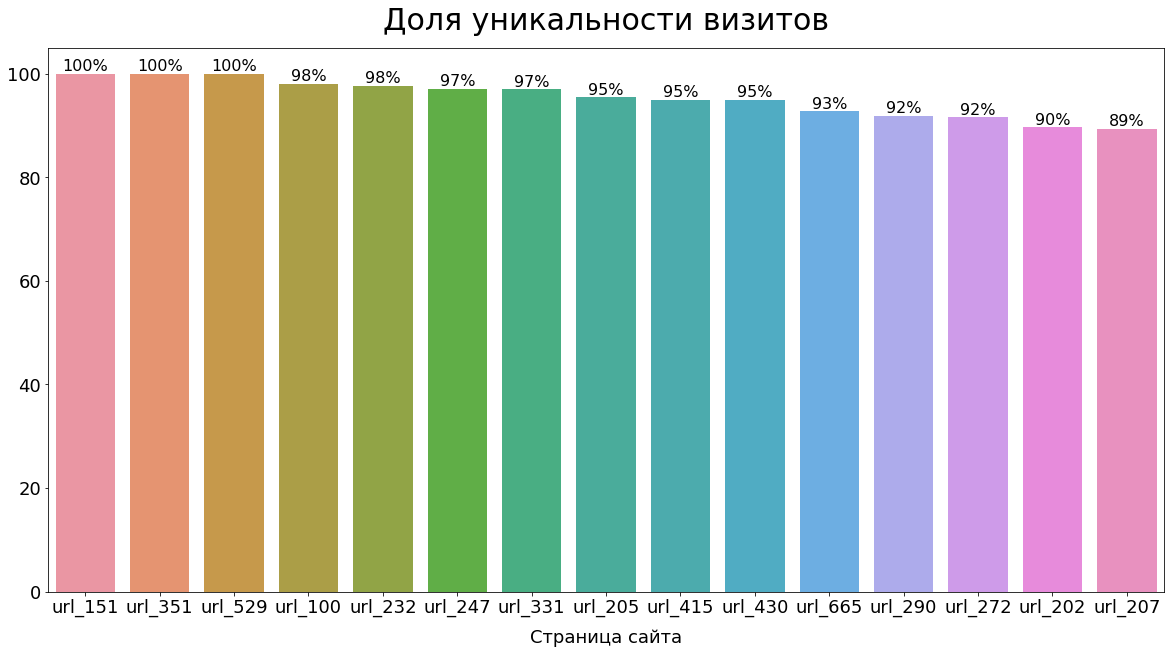

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=df_unique_by_urls.sort_values(['percentage_of_uniqueness'], ascending=False).head(15),
                  x='url', y='percentage_of_uniqueness')
ax.set_title('Доля уникальности визитов', fontsize=30, pad=18)
ax.set_xlabel('Страница сайта', fontsize=18, labelpad=12)
ax.set_ylabel('')
ax.tick_params(axis='both', labelsize=18)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{x:,.0f}%' for x in container.datavalues], fontsize=16)

<AxesSubplot:xlabel='percentage_of_uniqueness', ylabel='Count'>

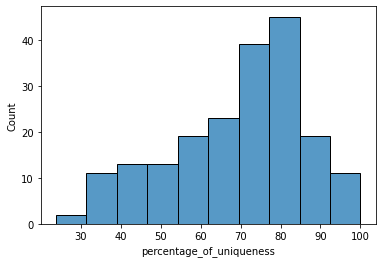

In [25]:
'''
любопытно было посмотреть как распределяется частота процента уникальности
'''
sns.histplot(df_unique_by_urls.percentage_of_uniqueness)

In [26]:
df_unique_by_urls.sort_values(['percentage_of_uniqueness'], ascending=[False]).url.head(3)

24     url_151
101    url_351
150    url_529
Name: url, dtype: object

<h2>Задание 2</h2>

перед тобой данные по платным каналам привлечения - затраты, показы, клики, а также привлеченные заявки и дальнейшие шаги по воронке (заявки -> открытые счета -> утилизации). 

— какие каналы и кампании принесли больше всего заявок? 

— какой канал оказался наиболее эффективным с точки зрения стоимости заявки и утилизации?

— какая конверсия в утилизацию в каждом канале по месяцам?

— есть ли еще какие-нибудь разрезы, которые ты бы проанализировал на этих данных? если да, то какие?

представь выводы с помощью сводных таблиц, графиков, диаграмм (на твое усмотрение)



In [27]:
'''
считываем файл и делаем предобработку данных
'''

df_task_2 = pd.read_csv('https://docs.google.com/spreadsheets/d/16PK0eO2CHFqdjmQGbWxUX8ZVfm4nN52kP0t3Azrt44k/export?format=csv', sep=',')

In [28]:
df_task_2.rename(columns = {'дата': 'date',
                            'канал': 'channel',
                            'название кампании': 'campaign_name',
                            'затраты': 'cost',
                            'показы': 'impression',
                            'клики': 'click',
                            'заявки': 'lead',
                            'открытые счета': 'open_accounts',
                            'утилизации': 'utilization'}, inplace=True)

In [29]:
df_task_2.cost = df_task_2.cost.str.replace(',', '.').astype('float').round(2)
df_task_2.date = pd.to_datetime(df_task_2.date, format='%Y-%m-%d')

In [30]:
'''
В кликах были дробные значения, наверно это логическая ошибка, так как не может быть части клика. Клик либо есть, либо нет.

На общую сумму кликов это не повлияло, проверял и сравнивал с иходным файлом.
'''

df_task_2.click = df_task_2.click.str.replace(',', '.').astype('float').round().astype('int64')

In [31]:
df_task_2['month'] = df_task_2.date.dt.to_period('M').dt.to_timestamp()

In [32]:
'''
— какие каналы и кампании принесли больше всего заявок? 
'''

top_channel_by_leads = df_task_2.groupby(['channel'], as_index=False).agg(ttl_lead=('lead', 'sum')).sort_values('ttl_lead')

share_list_by_channel = take_share_list(top_channel_by_leads, 'ttl_lead')

In [33]:
top_channel_by_leads

,channel,ttl_lead
2,Display,69
3,Other,126
4,Target,263
0,Bloggers,529
1,Context,1090


'\nContext приносит всех больше лидов, 52.48%\n'

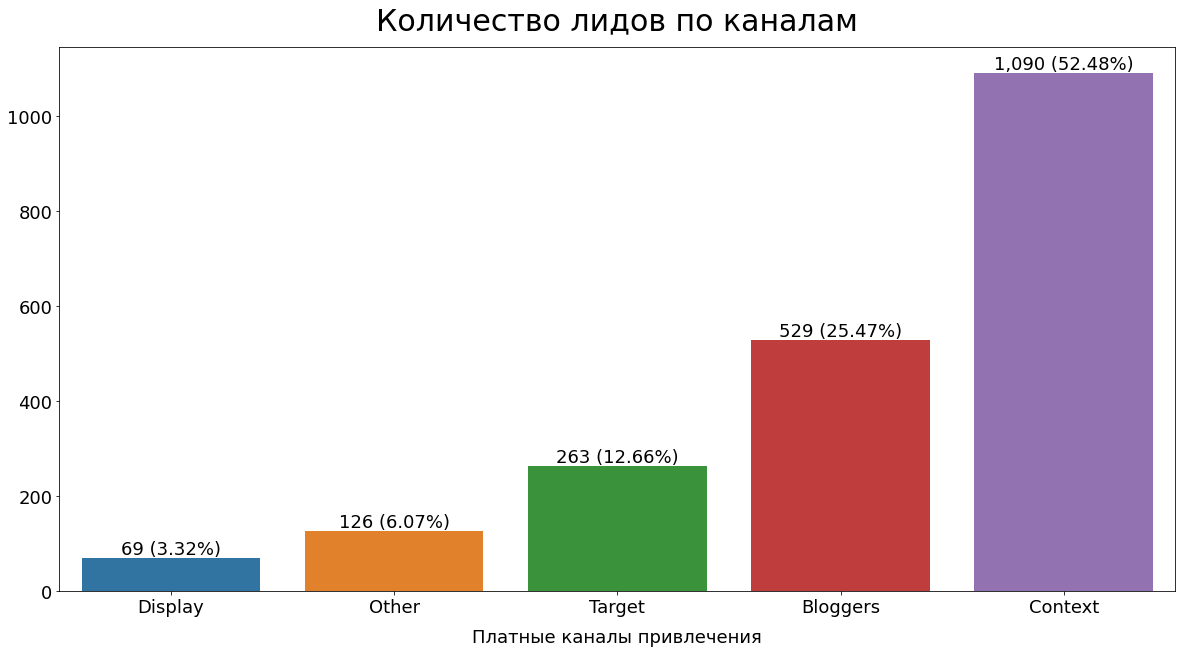

In [34]:
custom_barpolt(top_channel_by_leads, 'channel', 'ttl_lead', share_list_by_channel,
               'Количество лидов по каналам', 'Платные каналы привлечения',
              n_title=30, n_x=18, n_label=18)

'''
Context приносит всех больше лидов, 52.48%
'''

In [35]:
'''
— какие кампании принесли больше всего заявок?
'''

top_campaign_by_leads = df_task_2.groupby(['channel', 'campaign_name'], as_index=False) \
                                    .agg(ttl_lead=('lead', 'sum')).sort_values('ttl_lead', ascending=False)

top_campaign_by_leads['channel_and_campaign'] = top_campaign_by_leads.channel + ' ' + top_campaign_by_leads.campaign_name

share_list_by_campaign = take_share_list(top_campaign_by_leads, 'ttl_lead')

'\ncampaign_212 приносит всех больше лидов, канал Context.\n'

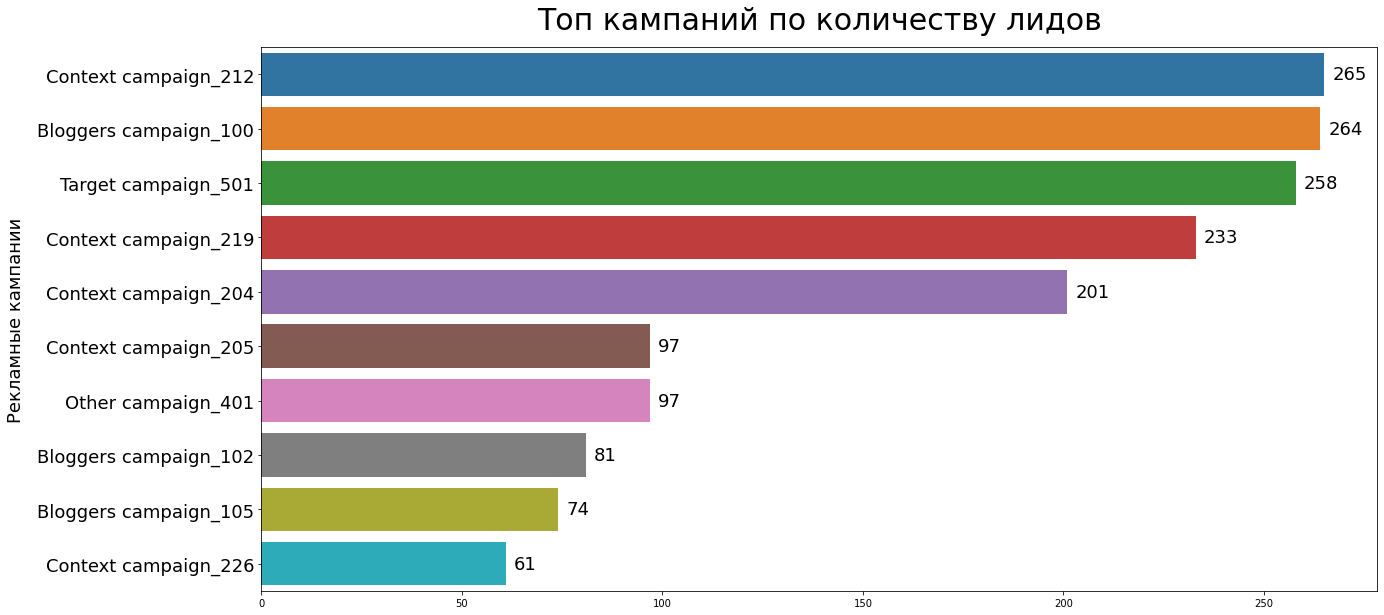

In [36]:
'''
строим график по кампаниям
'''

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=top_campaign_by_leads.head(10), x='ttl_lead', y='channel_and_campaign')
ax.set_title('Топ кампаний по количеству лидов', fontsize=30, pad=18)
ax.set_xlabel('')
ax.set_ylabel('Рекламные кампании', fontsize=18, labelpad=12)
ax.tick_params(axis='y', labelsize=18)
for container in ax.containers:
    ax.bar_label(container, 
                 labels=[f'{x:,.0f}' for i, x in enumerate(container.datavalues)]
                 , fontsize=18, padding=8)
    
    
'''
campaign_212 приносит всех больше лидов, канал Context.
'''

In [37]:
'''
— какой канал оказался наиболее эффективным с точки зрения стоимости заявки и утилизации?

CPL - стоимость привлечения лида cost per lead
CAC - стоимость привлечения пользователя, который открыл счёт
CPU - стоимость привлечения пользователя, который совершил хотя бы одно дейтствие на счёте cost per utilization
'''

'\n— какой канал оказался наиболее эффективным с точки зрения стоимости заявки и утилизации?\n\nCPL - стоимость привлечения лида cost per lead\nCAC - стоимость привлечения пользователя, который открыл счёт\nCPU - стоимость привлечения пользователя, который совершил хотя бы одно дейтствие на счёте cost per utilization\n'

In [38]:
df_with_metrics = df_task_2.groupby('channel', as_index=False).agg(sum_cost = ('cost', 'sum'),
                                                     sum_lead = ('lead', 'sum'),
                                                     sum_open_accounts=('open_accounts', 'sum'),
                                                     sum_utilization=('utilization', 'sum')).copy()

df_with_metrics['conversion_in_utilization'] = (df_with_metrics.sum_utilization / df_with_metrics.sum_lead).mul(100).round(2)
df_with_metrics['cpl'] = (df_with_metrics.sum_cost/df_with_metrics.sum_lead).round(2)
df_with_metrics['cac'] = (df_with_metrics.sum_cost/df_with_metrics.sum_open_accounts).round(2)
df_with_metrics['cpu'] = (df_with_metrics.sum_cost/df_with_metrics.sum_utilization).round(2)

'''
Чем стоимость лида меньше, тем канал считается эффективнее так как 
за меньшие деньги мы смогли привлечь большее количество клиентов.

Самый низкий CPL у канала «Bloggers».

Самый низкий CPU(стоимость привлечения активного пользователя) у канала «Context».
'''

'\nЧем стоимость лида меньше, тем канал считается эффективнее так как \nза меньшие деньги мы смогли привлечь большее количество клиентов.\n\nСамый низкий CPL у канала «Bloggers».\n\nСамый низкий CPU(стоимость привлечения активного пользователя) у канала «Context».\n'

(0.0, 15.0)

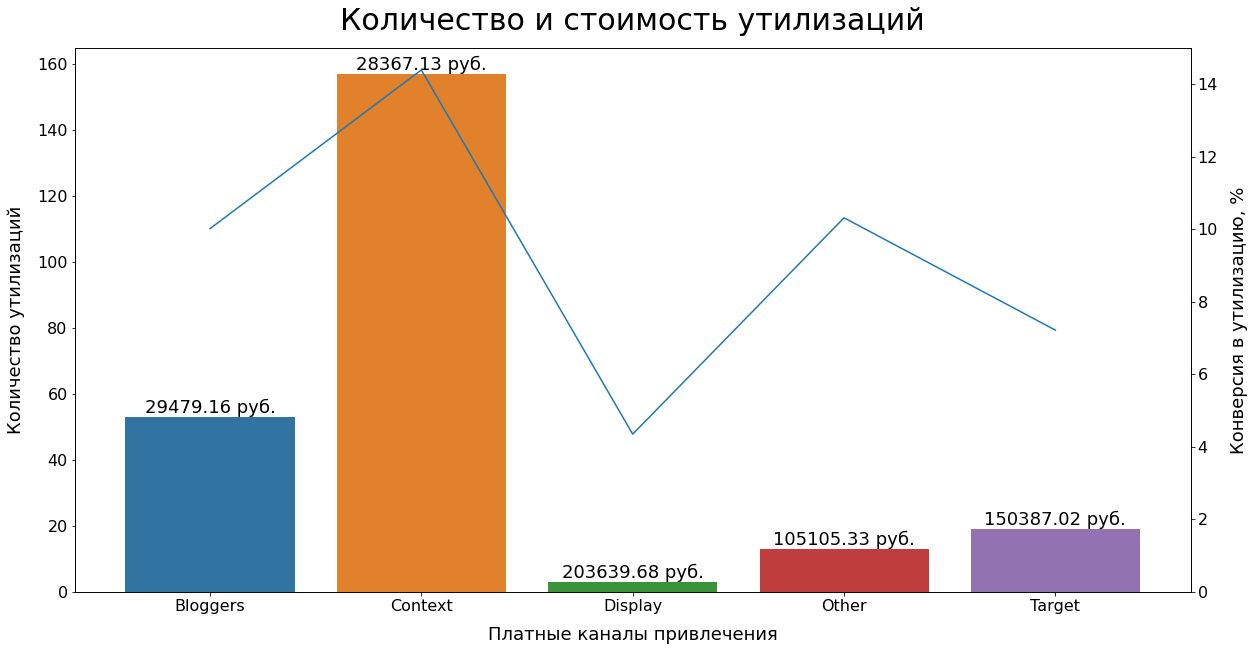

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=df_with_metrics, x='channel', y='sum_utilization')
ax.set_title('Количество и стоимость утилизаций', fontsize=30, pad=18)
ax.set_xlabel('Платные каналы привлечения', fontsize=18, labelpad=12)
ax.set_ylabel('Количество утилизаций', fontsize=18, labelpad=12)
ax.tick_params(axis='both', labelsize=16)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{df_with_metrics.cpu[i]} руб.' for i, x in enumerate(container.datavalues)], fontsize=18)
    
ax2 = ax.twinx()

sns.lineplot(data=df_with_metrics, x='channel', y='conversion_in_utilization', ax=ax2)
ax2.set_ylabel('Конверсия в утилизацию, %', fontsize=18, labelpad=12)
ax2.tick_params(axis='both', labelsize=16)
plt.ylim(0, 15)

In [41]:
'''
— какая конверсия в утилизацию в каждом канале по месяцам?
'''

df_utilization = df_task_2.groupby(['month', 'channel'], as_index=False).agg(sum_lead=('lead', 'sum'),
                                                           sum_utilization=('utilization', 'sum')).copy()

df_utilization['conversion'] = (df_utilization.sum_utilization / df_utilization.sum_lead).mul(100).round(2)
df_utilization.sort_values(['month', 'conversion'], ascending=[True, False], inplace=True)
df_utilization.month = df_utilization.month.astype('str')

In [42]:
df_utilization

,month,channel,sum_lead,sum_utilization,conversion
1,2022-11-01,Context,621,98,15.78
3,2022-11-01,Other,56,7,12.50
0,2022-11-01,Bloggers,267,32,11.99
4,2022-11-01,Target,144,12,8.33
2,2022-11-01,Display,32,2,6.25
6,2022-12-01,Context,469,59,12.58
8,2022-12-01,Other,70,6,8.57
5,2022-12-01,Bloggers,262,21,8.02
9,2022-12-01,Target,119,7,5.88
7,2022-12-01,Display,37,1,2.70


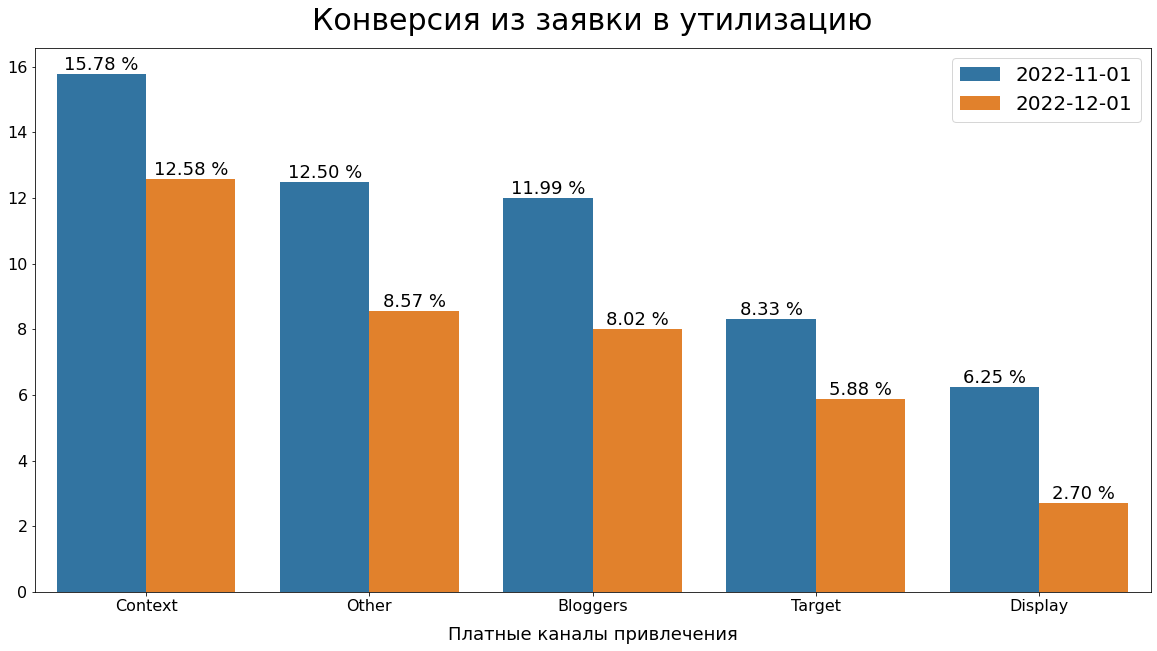

In [43]:
'''
строим 
'''

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=df_utilization, x='channel', y='conversion', hue='month')
ax.set_title('Конверсия из заявки в утилизацию', fontsize=30, pad=18)
ax.set_xlabel('Платные каналы привлечения', fontsize=18, labelpad=12)
ax.set_ylabel('')
ax.tick_params(axis='both', labelsize=16)
ax.legend(fontsize=20, bbox_to_anchor = (1, 1))
for container in ax.containers:
    ax.bar_label(container, labels=[f'{x:.2f} %' for i, x in enumerate(container.datavalues)], fontsize=18)

<AxesSubplot:xlabel='date', ylabel='cost'>

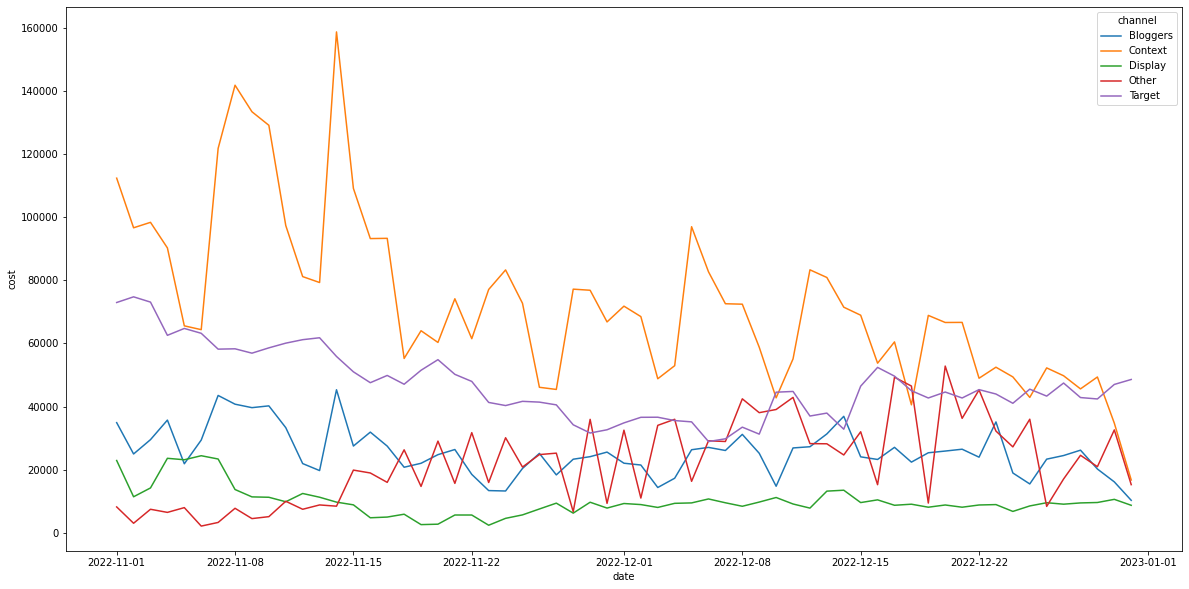

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=df_task_2.groupby(['date', 'channel'], as_index=False).agg('sum'), x='date', y='cost', hue='channel')